<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Stanarize_normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

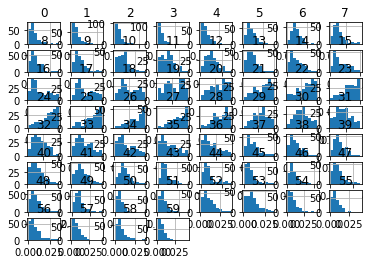

In [20]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()


In [21]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767    0.175311    0.1

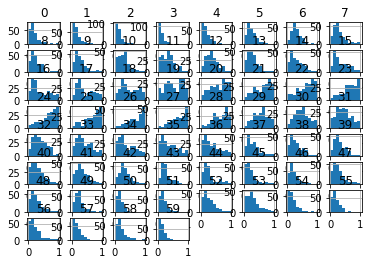

In [22]:
# visualize a minmax scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

In [23]:
# evaluate knn on the sonar dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.813 (0.085)


                 0             1             2             3             4   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean   1.708035e-17  6.832142e-17 -1.195625e-16  1.622634e-16 -1.793437e-16   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00   
min   -1.206158e+00 -1.150725e+00 -1.104253e+00 -1.036115e+00 -1.236093e+00   
25%   -6.894939e-01 -6.686781e-01 -6.490624e-01 -6.359298e-01 -6.703975e-01   
50%   -2.774703e-01 -2.322506e-01 -2.486515e-01 -2.120457e-01 -2.292089e-01   
75%    2.784345e-01  2.893335e-01  3.682681e-01  2.285353e-01  4.524231e-01   
max    4.706053e+00  5.944643e+00  6.836142e+00  8.025419e+00  5.878863e+00   

                 5             6             7             8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean   2.049643e-16  1.024821e-16  3.416071e-17 -3.757678e-16  3.416071e-17   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.

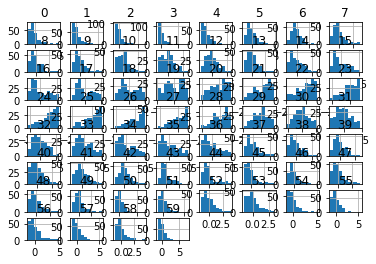

In [24]:

# visualize a standard scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

In [25]:
# evaluate knn on the sonar dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.810 (0.080)
